# Welcome to the Intro to Astronomy Research Gaia Data Release 2 (DR2) Tutorial.

#### Written by Sarah Blunt, 2018

### In this tutorial, you will:
- learn about the Astronomical Data Query Language (ADQL)
- use the Gaia DR2 Database and the NASA Exoplanet Archive to get Gaia parameters for the 10,000 closest stars
- plot a color-magnitude diagram

### Notes:
- This tutorial is challenging! If you spend more than 15 minutes stuck on a task, post about it on Piazza (you can post anonymously if you want). An instructor will help you out! Don't struggle needlessly.
- Make sure you complete the pandas and matplotlib tutorials before attempting this tutorial.

# Learn About ADQL

- Navigate to the Gaia ADQL interface. First, go [here](https://gea.esac.esa.int/archive/). Click "Search," then click "Advanced (ADQL)" (in the top left corner of the page). 

- Read [this webpage](https://gea.esac.esa.int/archive-help/adql/index.html). 

- Read slides 6-17 in [this powerpoint](https://www.cosmos.esa.int/documents/915837/915858/ADQL_handson_slides.pdf/652b9120-a3fe-4857-b5eb-933b476687ad).

   Try out some of the commands for yourself in the Gaia ADQL search bar you opened in step 1. Using the buttons that pop up to the right of your query results, you can download the results or view them in your browser. Hover over the buttons to see what they do.

   Don't worry if you don't understand everything in the powerpoint! Pick out the 7 most important slides and summarize them for yourself. 
   
   ** Note: wherever the powerpoint uses "gaiadr1.tgas_source," replace with "gaiadr2.gaia_source."

# Use the Gaia DR2 Database and the NASA Exoplanet Archive to Get Gaia Parameters for the 10,000 Closest Stars

### Write an ADQL query to get parameters of the 10,000 closest stars. Your query should return the following parameters:

- BP - RP color (bp_rp in the Gaia database)
- absolute g-band photometric magnitude 
- distance

<span style="color:red">ADQL QUERY COMMAND:</span>

```
SELECT TOP 10000
	phot_g_mean_mag + 5 * log10(parallax/1000) + 5 AS g_abs, bp_rp, 1/parallax AS dist
FROM gaiadr2.gaia_source 
WHERE parallax > 0
ORDER BY parallax DESC
```


### Download your Query Results as a csv file. 

### Hints:
- Distance is the inverse of parallax. 
- You can calculate absolute photometric magnitude in the gband using this formula: phot_g_mean_mag + 5 + 5 * log10(parallax/1000)
- You'll need to use "ORDER BY" in your ADQL command.
- Some Gaia sources have negative parallaxes due to instrumental imperfections. You'll need to add a line to your query specifying that parallax must be greater than 0. 
- Using the buttons that pop up to the right of your query results, you can download the results or view them in your browser. Hover over the buttons to see what they do.

# Plot a Color-Magnitude Diagram of the 10,000 Closest Stars

### 1. Using [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html), read your downloaded csv file into a pandas DataFrame

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

# Type your pd.read_csv command here: 
data = pd.read_csv('gaia-query-results.csv')

# HINTS: 
# - make sure the jupyter notebook and your csv file are in the same directory
# - your read_csv command should be 1 line of code

Populating the interactive namespace from numpy and matplotlib


### 2. Using matplotlib.pyplot, make a scatterplot of BP-RP color vs absolute g-band magnitude. This is a [color-magnitude diagram](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram)! 

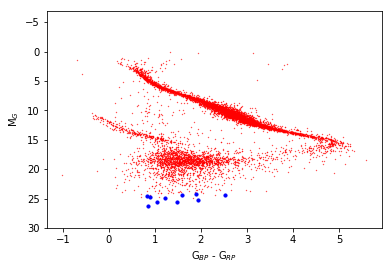

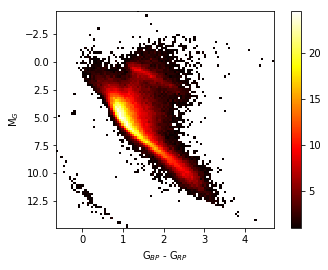

In [145]:
plt.figure()

# Type your plotting code here:
plt.scatter(data.bp_rp, data.g_abs, s=.1, color='red')




# More Fun Things to Try if You're Interested:

# - use plt.ylim to reverse the direction of the y axis.
plt.ylim(30,-7)

# - give your plot x and y labels.
plt.xlabel('G$_{BP}$ - G$_{RP}$')
plt.ylabel('M$_G$')

# - make the points red
# (changed in initial plotting command)

# - make the 10 closest stars red
data = data.sort_values(by = 'dist')
data_no_nans = data.dropna()  # remove NaN values
plt.scatter(
    data_no_nans.bp_rp.iloc[0:10], 
    data_no_nans.g_abs.iloc[0:10], 
    color='blue',  # blue instead of red for clarity in answer key
    s=10.   # make these points bigger for clarity in answer key
)  

# - compare your results against Figure 1 in this paper: https://arxiv.org/pdf/1804.09378.pdf. 
#     What similarities and differences do you notice? 

"""
In the paper, a heat map is presented, so relative density is easier to see. They also have more datapoints
than we do. I see some of the same features, though, notably thick diagonal line going from top left 
to bottom right.
"""

#     Challenge: read section 2.1 of this paper and try to reproduce their plot exactly.

# To make the plot below, I used the ADQL query shown in the below jupyter notebook cell.
#  Note that I only selected the top 100,000 results for simplicity, not all 13,000,000 as the paper does.
challenge_data = pd.read_csv('gaia-query-challenge-results.csv')

# make a density heatmap
plt.figure()

heatmap, xedges, yedges = np.histogram2d(  
    challenge_data.bp_rp.values,
    challenge_data.g_abs.values,
    bins=100
)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

heatmap = np.ma.masked_where(heatmap == 0.0, heatmap)

color_map = plt.cm.hot
color_map.set_bad(color='white')

plt.imshow(
    np.sqrt(heatmap.T), 
    extent=extent, 
    cmap=color_map, 
    aspect=(extent[1]-extent[0])/(extent[3]-extent[2]), 
    origin='lower'
)
plt.colorbar()
plt.xlabel('G$_{BP}$ - G$_{RP}$')
plt.ylabel('M$_G$')
plt.gca().invert_yaxis()


# To make this look exactly like the figure from the paper, we'd just need to plot all stars in the Gaia catalogue

<span style="color:red">ADQL Query Command for Data from Babusiaux et al. (2018) (Appendix B):</span>

```
SELECT TOP 100000
    phot_g_mean_mag+5*log10(parallax)-10 AS g_abs, bp_rp FROM gaiadr2.gaia_source
WHERE parallax_over_error > 10
AND phot_g_mean_flux_over_error > 50
AND phot_rp_mean_flux_over_error > 20
AND phot_bp_mean_flux_over_error > 20
AND phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
AND phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
AND visibility_periods_used > 8
AND astrometric_chi2_al/(astrometric_n_good_obs_al-5) < 1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))
```